# <font color='red'><b>Bootstrap assignment</b> </font>

<b>There will be some functions that start with the word "grader" ex: grader_sampples(), grader_30().. etc, you should not change those function definition.

Every Grader function has to return True.</b>

<font color='blue'> <b>Importing packages</b> </font>

In [73]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric

In [74]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

C:\Users\bhagy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [75]:
x.shape

(506, 13)

In [76]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

* <font color='red'><b> Note - While selecting the random 60% datapoints from the whole data, make sure that the selected datapoints are all exclusive, repetition is not allowed. </b></font>

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
Predict the house price for this point as mentioned in the step 2 of Task 1.

## <font color='red'><b>A few key points</b></font>

* Remember that the datapoints used for calculating MSE score contain some datapoints that were initially used while training the base learners (the 60% sampling). This makes these datapoints partially seen (i.e. the datapoints used for calculating the MSE score are a mixture of seen and unseen data).
Whereas, the datapoints used for calculating OOB score have only the unseen data. This makes these datapoints completely unseen and therefore appropriate for testing the model's performance on unseen data.

* Given the information above, if your logic is correct, the calculated MSE score should be less than the OOB score.

* The MSE score must lie between 0 and 10.
* The OOB score must lie between 10 and 35.

* The difference between the left nad right confidence-interval values must not be more than 10. Make sure this is true for both MSE and OOB confidence-interval values.

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/OfcFrUP.jpg/)

*  <font color='blue'><b> Write code for generating samples</b></font>

In [77]:
def generating_samples(input_data, target_data):

    '''In this function, we will write code for generating 30 samples '''
    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples 
    

    # return sampled_input_data , sampled_target_data,selected_rows,selected_columns
    #note please return as lists
    
    #randomly selecting row indices to sample
    selecting_rows = np.random.choice(input_data.shape[0],303,replace = False)
    #randomly selecting replacement rows from the above sample row indices
    replacing_rows = np.random.choice(selecting_rows.shape[0],203, replace = False)
    #COLUMN SAMPLING
    #randomly selects number of column to sample (min 3 have to be, as mentioned in the task description)
    no_of_cols_to_sample = np.random.randint(3,13)
    #randomly picks the above selected number of column indices
    selecting_columns = np.random.choice(range(13),no_of_cols_to_sample,replace = False) 
    #getting the sample data from original data after row and column sampling
    sample_data = input_data[selecting_rows[:,None],selecting_columns] #the [:,None] is given to avoid indexing errors 
    #getting the target data corresponding to the sampled row indices
    target_data = target_data[selecting_rows]
    
    #REPLICATING DATA.
    replicated_sample_data = sample_data[replacing_rows]
    target_of_replicated_sample_data = target_data[replacing_rows]
    
    #CONCATENATING SAMPLE AND REPLICATED DATA AND TARGET DATA.
    final_sample_data = np.vstack((sample_data, replicated_sample_data))
    final_target_data = np.vstack((target_data.reshape(-1,1),target_of_replicated_sample_data.reshape(-1,1)))
    
    return list(final_sample_data), list(final_target_data), list(selecting_rows), list(selecting_columns)

<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [78]:
def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d = generating_samples(x, y)
grader_samples(a,b,c,d)

True

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [79]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list
def create_30_samples(x,y,generating_samples):
    '''
    Function takes input data (ie. x), target data (ie. y) and the generating_samples as a parameter.
    
    Creates 30 samples and returns the input data, target data, row sampling indices and column sampling indices
    for each of the 30 samples as lists.
    '''
    list_input_data =[]
    list_output_data =[]
    list_selected_row= []
    list_selected_columns=[]

    for i in range(30):
        a,b,c,d = generating_samples(x,y)
        list_input_data.append(a)
        list_output_data.append(b)
        list_selected_row.append(c)
        list_selected_columns.append(d)
        
    return list_input_data, list_output_data, list_selected_row, list_selected_columns

    

In [80]:
#For the grader function to consider the list_input_data
list_input_data =[]
list_output_data =[]
list_selected_row= []
list_selected_columns=[]

for i in range(30):
    a,b,c,d = generating_samples(x,y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)
    list_selected_columns.append(d)

<font color='cyan'> <b>Grader function - 2 </b></font>

In [81]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
grader_30(list_input_data)

True

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> Write code for building regression trees</b></font>

In [82]:
from sklearn.tree import DecisionTreeRegressor
def create_30_models(list_input_data, list_output_data):
    '''
    Function creates 30 models each fitting one of the 30 samples created previously respectively.
    Returns a dictionary storing all the 30 trained models and a list of the model names.
    
    '''
    all_models = {}
    for i in range(1,31):
        all_models['model_'+str(i)]= DecisionTreeRegressor(max_depth= None).fit(list_input_data[i-1], list_output_data[i-1])

    list_of_all_models = all_models.keys()
    return all_models, list_of_all_models

<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> Write code for calculating MSE</b></font>

In [83]:
def calculate_MSE(x,y,list_of_selected_columns, all_models, list_of_all_models):
    '''
    The function takes the input data (i.e x), the target variable values (i.e y), list of selected columns as part
    of column sampling for each of the 30 samples, all_models dictionary containing all the trained models and a list with the 
    names of the models created.
    
    Returns the calculated MSE score.
    '''
    predicted_y = []
    for j in range(x.shape[0]):
        pred_j = []
        for i in range(len(list_of_all_models)):
            pred = all_models['model_'+str(i+1)].predict(x[j,list_of_selected_columns[i]].reshape(1,-1))[0]
            pred_j.append(pred)
        predicted_y.append(np.median(np.asarray(pred_j)))
    return mean_squared_error(y, np.asarray(predicted_y))

<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Write code for calculating OOB score </b></font>

In [84]:
def calculate_OOBscore(x, y, list_selected_row, list_selected_columns, all_models, list_of_all_models):
    '''
    The function takes the input data (i.e x), the target variable values (i.e y), list of selected columns as part
    of column sampling for each of the 30 samples, list of selected rows for each of the 30 samples,
    all_models dictionary containing all the trained models and a list with the 
    names of the models created.
    
    Returns the calculated OOB score.
    '''
    predicted_y = []
    for j in range(x.shape[0]):
        pred_j = []
        for i in range(len(list_of_all_models)):
            if j not in list_selected_row[i]:
                pred = all_models['model_'+str(i+1)].predict(x[j,list_selected_columns[i]].reshape(1,-1))
                pred_j.append(pred[0])
        predicted_y.append(np.median(np.asarray(pred_j)))

    return mean_squared_error(y, np.asarray(predicted_y))

# <font color='blue'><b>Task 2</b></font>

In [85]:
# Repeating the task 1 35 times

oob_scores = []
mse_scores =[]

for counter in range(35):
    a,b,c,d = create_30_samples(x,y, generating_samples)
    all_models, list_of_all_models = create_30_models(a,b)
    mse = calculate_MSE(x,y,d, all_models, list_of_all_models)
    oob = calculate_OOBscore(x,y,c,d, all_models, list_of_all_models)
    oob_scores.append(oob)
    mse_scores.append(mse)
    
print("MSE Scores ----> ",mse_scores)
print('*'*100)
print("OOB Scores ---->", oob_scores)

MSE Scores ---->  [0.03620059288537551, 0.17243479795366695, 0.035424901185770775, 0.05548418972332015, 0.10088438735177865, 0.11283102766798422, 0.030563241106719347, 0.24658102766798423, 0.07693675889328062, 0.09696146245059292, 0.06071269762845847, 0.029607213438735173, 0.010513833992094853, 0.04598562252964428, 0.12465920817474253, 0.2501284677982059, 0.13343255234333332, 0.2790826341711957, 0.03428359683794463, 0.07492430754416388, 0.016621788537549417, 0.001765069169960468, 0.03663921826965303, 0.0911122228523984, 0.10453186758893283, 0.1314624505928854, 0.08433551250754516, 0.06851284584980243, 0.01428085199824331, 0.019660326086956545, 0.17373517786561268, 0.17009198924134872, 0.08891304347826091, 0.24395865893994292, 0.05028065078561393]
****************************************************************************************************
OOB Scores ----> [14.364926528284819, 17.45129323682701, 16.709997080207344, 10.374446640316206, 15.705431909015108, 13.523848814229247, 14.01

In [111]:
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

MSE Score Confidence Interval is:  (0.06944593190458984, 0.11932745067310718)


<IPython.core.display.Javascript object>


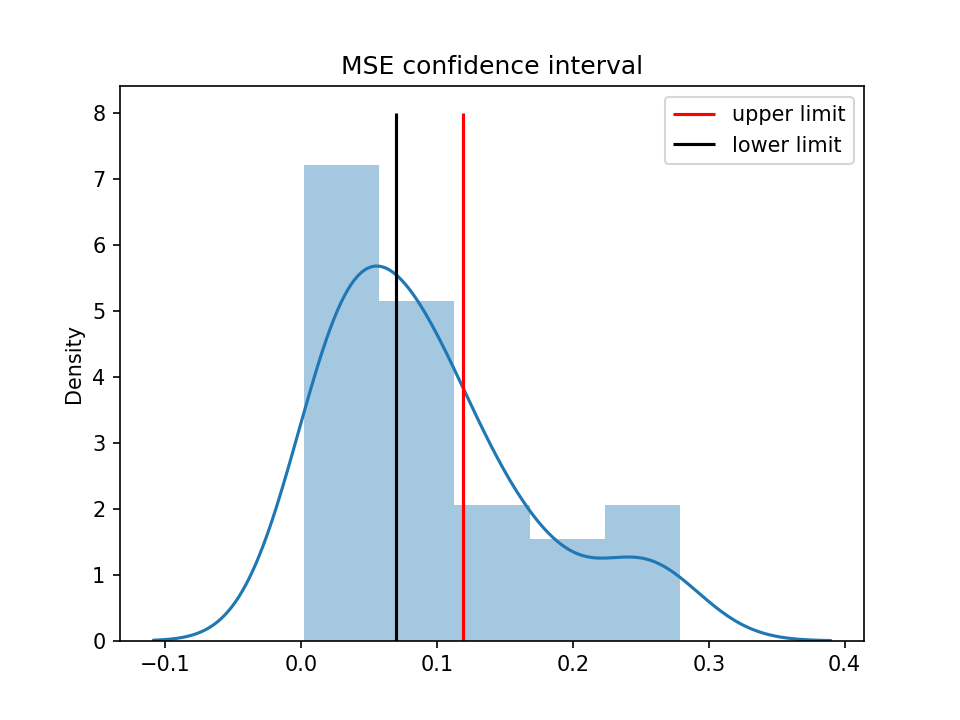

C:\Users\bhagy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'MSE confidence interval')

In [141]:
#Calculating the confidence intervals for MSE Score
MSE = np.array(mse_scores)
sample_mse = MSE#[np.random.choice(MSE.shape[0], replace = True, size = 100)]
upper_limit = sample_mse.mean()+2*(sample_mse.std())/np.sqrt(35)
lower_limit = sample_mse.mean()-2*(sample_mse.std())/np.sqrt(35)
print("MSE Score Confidence Interval is: ", (lower_limit, upper_limit))
fig, ax = plt.subplots()
sns.distplot(sample_mse)
plt.vlines(x = upper_limit, ymin = 0, ymax = 8, colors = 'red', label = 'upper limit')
plt.vlines(x = lower_limit, ymin = 0, ymax = 8, colors = 'black', label = 'lower limit')
plt.legend()
plt.title("MSE confidence interval")

OOB Score Confidence Interval is:  (14.407639809530776, 15.832757170063603)


<IPython.core.display.Javascript object>


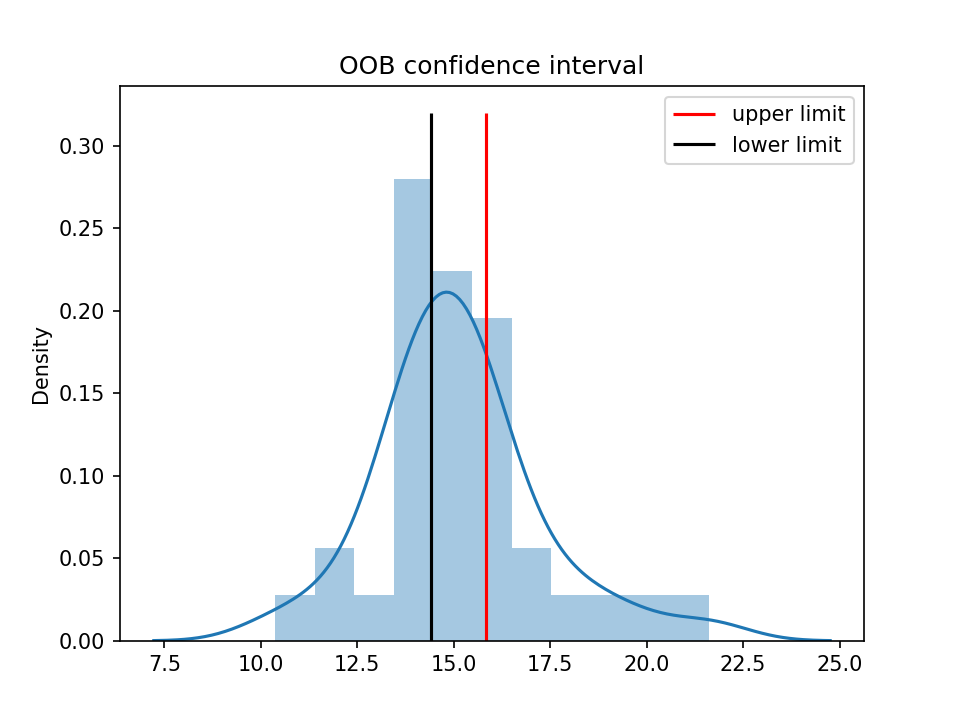

C:\Users\bhagy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'OOB confidence interval')

In [140]:
#Calculating the confidence intervals for OOB Score
OOB = np.array(oob_scores)
sample_oob = OOB#[np.random.choice(OOB.shape[0], replace = True, size = 100)]
upper_limit = sample_oob.mean()+2*(sample_oob.std())/np.sqrt(35)
lower_limit = sample_oob.mean()-2*(sample_oob.std())/np.sqrt(35)
print("OOB Score Confidence Interval is: ", (lower_limit, upper_limit))
fig, ax = plt.subplots()
sns.distplot(sample_oob)
plt.vlines(x = upper_limit, ymin = 0, ymax = 0.32, colors = 'red', label = 'upper limit')
plt.vlines(x = lower_limit, ymin = 0, ymax = 0.32, colors = 'black', label = 'lower limit')
plt.legend()
plt.title("OOB confidence interval")

# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b> Write code for TASK 3 </b></font>

In [139]:
def predict(query_point, all_models, list_selected_columns):
    '''
    Takes a query point in numpy array format and predicts the value of target variable for it.
    '''
    y_pred = []
    for i in range(len(all_models.keys())):
        pred = all_models['model_'+str(i+1)].predict(query_point[list_selected_columns[i]].reshape(1,-1))
        y_pred.append(pred)
    return np.median(np.asarray(y_pred))

xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
predict(np.array(xq), all_models, d)

19.049999999999997

<br><br><br>

<font color='red'><b>Write observations for task 1, task 2, task 3 indetail</b></font>

Summary of Task 1:

1. Our goal was to sample 30 random samples from the original given dataset with row and column sampling performed. 
2. Each only 60% of the original data was shown to each model, while the remaining 40% was kept hidden from each model. However we did add randomly sampled data from the 60% sampled data to compensate for the 40% that was kept hidden. 
3. Each model was trained on a random no of columns that were randomly sampled from the available ones. Two or more models in the 30 models trained did have some chance of having the same no of columns but care was taken to ensure there were no repetition of columns in a given sample. i.e, each sample will have only one occurrence of a column.
4. There were repetition of rows in the samples due to replacement done.
5. The MSE score obtained was obviously better the OOB Score since in case of MSE evaluation, data that the model had previously seen was also considered (the 60% that was sampled from the original dataset that was part of the sample data on which the individual models weere trained). Whereas, in OOB score calculation each individual model was evaluated on data the data it had not seen before.


Summary of Task 2:

1. We reapeated the task 1 35 times to obtain 35 MSE and OOB Scores.
2. Using these 35 different values for each of them, their respective confidence interval was calculated using the central limit theorem.
3. Using the CLT technique when the population standard deviation is not known. First enough samples are generated, in this case 35 samples. Then the confidence interval was calculated using the formula:

    upper limit = sample_mean + 2*(sample_std)/sqrt(n)     
                                                           
                                                           (where n = no of samples)

    lower limit = sample_mean + 2*(sample_std)/sqrt(n)
    

4. The confidence interval of MSE is shorter than that of OOB Score which implies that degree of precision is higher for MSE as expected. 

Summary of Task 3:

1. To make a prediction for a new query point.
2. We have to pass the query point to all the 30 models that are part of the sample. We have to ensure appropriate column sampling according to the number of features on which each of the individual models were trained.
3. The median of predictions from each of the models is taken as the final prediction/ output for the query point.